In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import numpy as np
import warnings


In [2]:
df=pd.read_csv("pizza_sales.csv")

# Importing the dataset

In [3]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# Metadata of data

In [4]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of        pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0             1         1     hawaiian_m         1  01-01-2015   11:38:36   
1             2         2  classic_dlx_m         1  01-01-2015   11:57:40   
2             3         2  five_cheese_l         1  01-01-2015   11:57:40   
3             4         2    ital_supr_l         1  01-01-2015   11:57:40   
4             5         2     mexicana_m         1  01-01-2015   11:57:40   
...         ...       ...            ...       ...         ...        ...   
48615     48616     21348  ckn_alfredo_m         1  31-12-2015   21:23:10   
48616     48617     21348  four_cheese_l         1  31-12-2015   21:23:10   
48617     48618     21348   napolitana_s         1  31-12-2015   21:23:10   
48618     48619     21349     mexicana_l         1  31-12-2015   22:09:54   
48619     48620     21350      bbq_ckn_s         1  31-12-2015   23:02:05   

       unit_price  total_price pizza_size p

In [6]:
# Total Revenue
total_revenue= df['total_price'].sum()
#total pizzas sold
total_pizzas_sold=df['quantity'].sum()
# Total Orders
Total_orders=df['order_id'].nunique()
avg_order_value=total_revenue/Total_orders
avg_pizzas_per_order=total_pizzas_sold/Total_orders
print(f"Total Revenue:${total_revenue:,.2f}")
print(f"Total Orders:{Total_orders:,}")
print(f"Total Pizzas sold:{total_pizzas_sold:,}")
print(f"Average order value:${avg_order_value:,.2f}")
print(f"Average pizzas per order:${avg_pizzas_per_order:,.2f}")

Total Revenue:$817,860.05
Total Orders:21,350
Total Pizzas sold:49,574
Average order value:$38.31
Average pizzas per order:$2.32


In [7]:
ingredient=(df['pizza_ingredients'].str.split(',').explode().str.strip().value_counts().reset_index().rename(columns={'index':'Count','pizza_ingredients':'Indegredients'})
)
print(ingredient.head(10))

       Indegredients  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


In [8]:
# Daily Trend- Total Orders

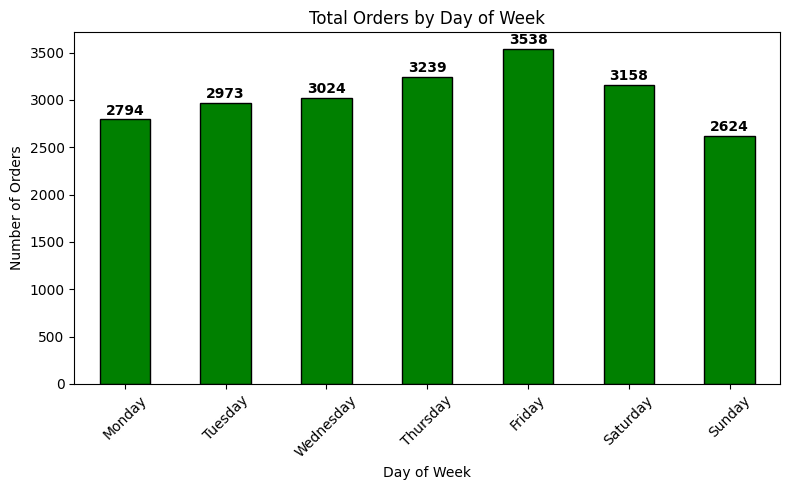

In [9]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)
df['day_name']=df['order_date'].dt.day_name()
weekday_order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert to categorical for proper sorting
df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

# Group by day of week
orders_by_day = df.groupby('day_name', observed=False)['order_id'].nunique()

# Plot
plt.figure(figsize=(8,5))
ax = orders_by_day.plot(kind='bar', color='green', edgecolor='black')

# Labels
plt.title("Total Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

# Annotate values on bars+
for i, val in enumerate(orders_by_day):
    plt.text(i, val + 20, str(val), ha='center', va='bottom',
             fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()


# Hourly Trend-Total Orders

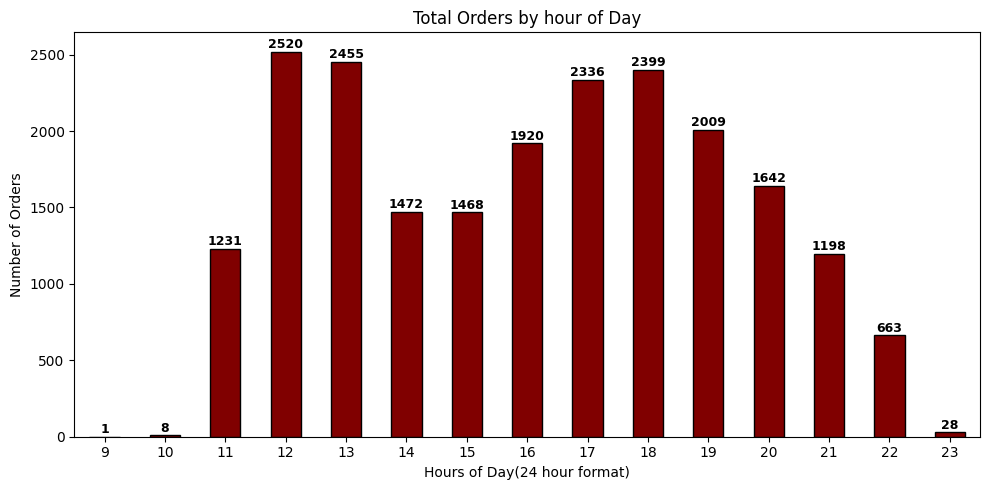

In [10]:
df['order_time']=pd.to_datetime(df['order_time'],format='%H:%M:%S')
df['order_hour']=df['order_time'].dt.hour
orders_by_hour=df.groupby('order_hour',observed=False)['order_id'].nunique()
ax = orders_by_hour.plot(kind='bar', figsize=(10,5), color='maroon', edgecolor='black')

plt.title("Total Orders by hour of Day")
plt.xlabel("Hours of Day(24 hour format)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

# Annotate values on bars+
for i, val in enumerate(orders_by_hour):
    plt.text(i, val + 5, str(val), ha='center', va='bottom',
             fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()


# Monthly Trend-Total Orders


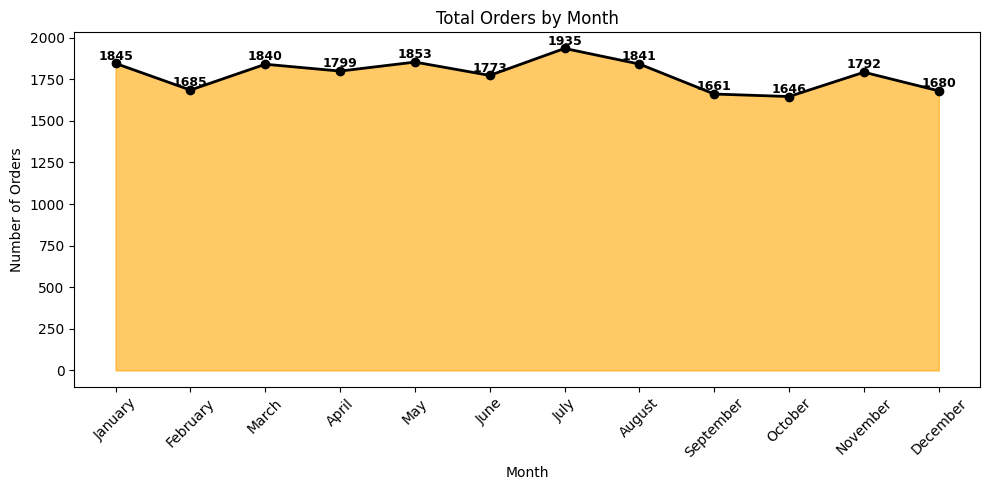

In [11]:
df['order_date']=pd.to_datetime(df['order_date'],format='%H:%M:%S')
df['month_name']=df['order_date'].dt.month_name()
month_order=["January","February","March","April","May","June","July","August",
             "September","October","November","December"]
df['month_name']=pd.Categorical(df['month_name'],categories=month_order,ordered=True)
orders_by_month=df.groupby('month_name',observed=False)['order_id'].nunique()
plt.figure(figsize=(10,5))
plt.fill_between(orders_by_month.index,orders_by_month.values,color="orange",alpha=0.6)
plt.plot(orders_by_month.index,orders_by_month.values,color="black",linewidth=2,marker='o')
plt.title("Total Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
# Annotate values on bars+
for i, val in enumerate(orders_by_month):
    plt.text(i, val + 5, str(val), ha='center', va='bottom',
             fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

# % Of Sales by Category

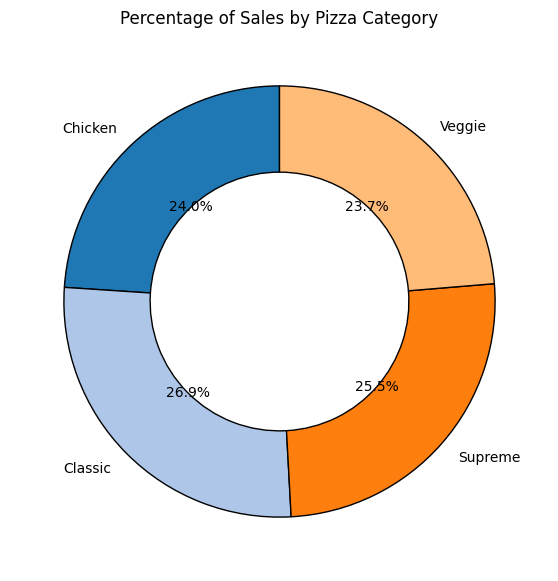

In [12]:
category_sales=df.groupby('pizza_category')['total_price'].sum()
category_pct=category_sales/category_sales.sum()*100
plt.figure(figsize=(7,7))
colors=plt.get_cmap('tab20').colors
plt.pie(category_pct,labels=category_pct.index,autopct='%1.1f%%',startangle=90,colors=colors,wedgeprops={'edgecolor':'black','width':0.4})
plt.title("Percentage of Sales by Pizza Category")
plt.show()

# % Sales by Pizza Size and Category

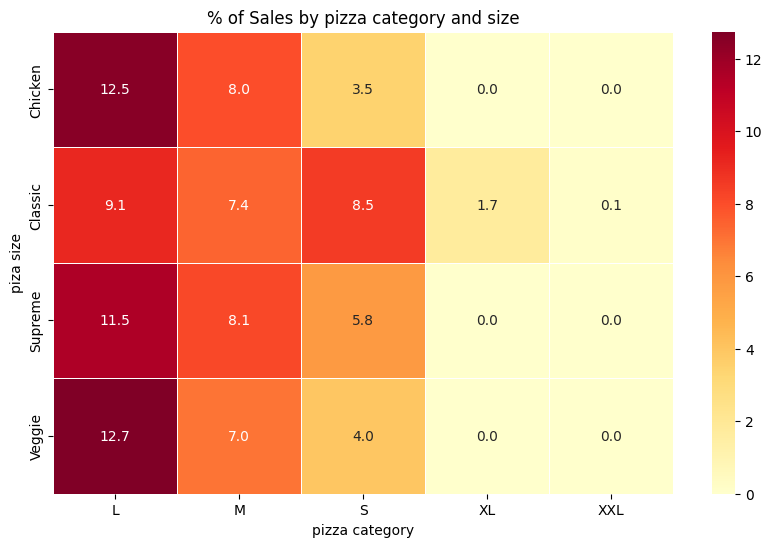

In [13]:
sales_pivot= df.pivot_table(index='pizza_category',
                            columns='pizza_size',values='total_price',aggfunc='sum',fill_value=0
)
sales_pct=sales_pivot/sales_pivot.sum().sum()*100
plt.figure(figsize=(10,6))
sns.heatmap(sales_pct,annot=True,fmt=".1f",cmap="YlOrRd",linewidth=0.5)
plt.title("% of Sales by pizza category and size")
plt.xlabel("pizza category")
plt.ylabel("piza size")
plt.show()

# Total pizzas sold by Pizza category

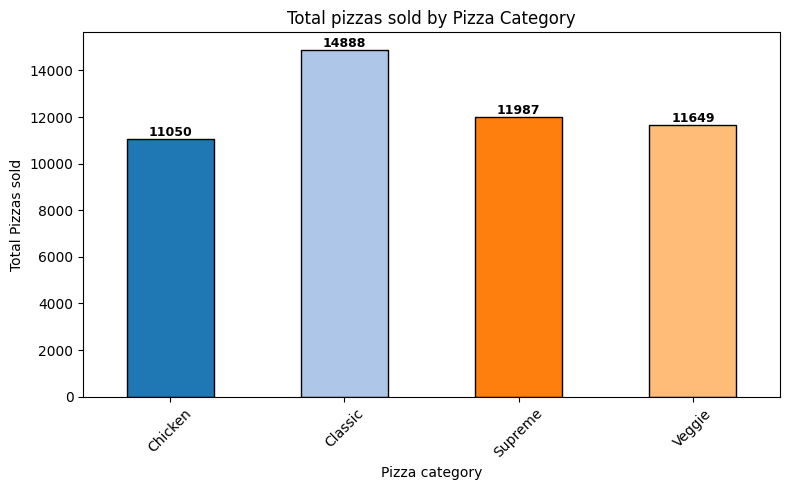

In [18]:
pizzas_by_category=df.groupby('pizza_category')['quantity'].sum()
colors=list(plt.get_cmap('tab20').colors)
colors=colors[:len(pizzas_by_category)]
ax=pizzas_by_category.plot(kind='bar',figsize=(8,5),color=colors,edgecolor='black')
plt.title("Total pizzas sold by Pizza Category")
plt.xlabel("Pizza category")
plt.ylabel("Total Pizzas sold")
plt.xticks(rotation=45)
for i, val in enumerate(pizzas_by_category):
    plt.text(i, val + 5, str(val), ha='center', va='bottom',
             fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()


# Top 5 Best Selling Pizzas-Total Orders


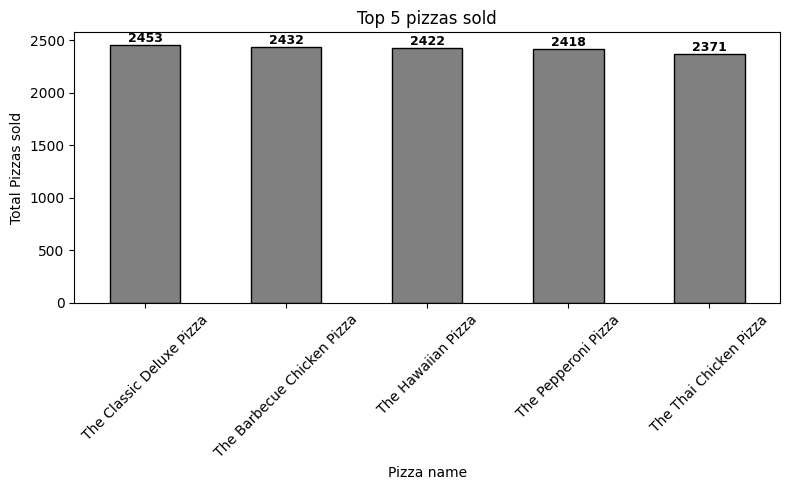

In [21]:
pizzas_by_name=df.groupby('pizza_name')['quantity'].sum()
top5=pizzas_by_name.sort_values(ascending=False).head(5)
ax=top5.plot(kind='bar',figsize=(8,5),color='grey',edgecolor='black')
plt.title("Top 5 pizzas sold")
plt.xlabel("Pizza name")
plt.ylabel("Total Pizzas sold")
plt.xticks(rotation=45)
for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom',
             fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

# Top 5 best selling Pizzas sold- total Sales

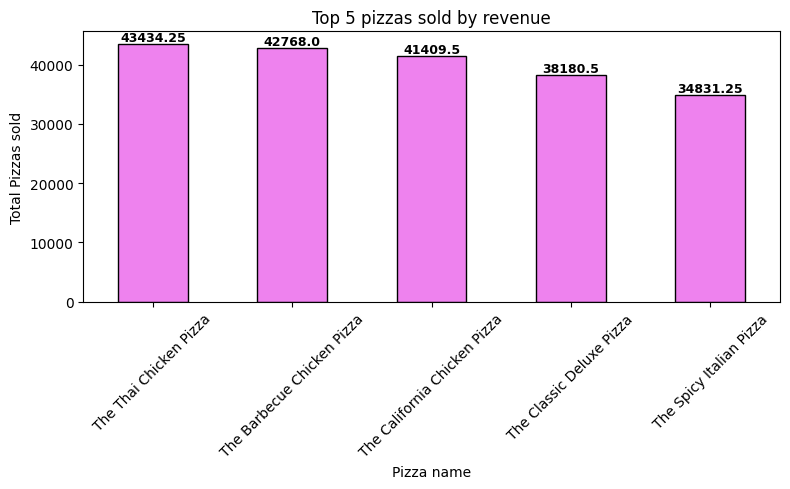

In [23]:
pizzas_by_name=df.groupby('pizza_name')['total_price'].sum()
top5=pizzas_by_name.sort_values(ascending=False).head(5)
ax=top5.plot(kind='bar',figsize=(8,5),color='violet',edgecolor='black')
plt.title("Top 5 pizzas sold by revenue")
plt.xlabel("Pizza name")
plt.ylabel("Total Pizzas sold")
plt.xticks(rotation=45)
for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom',
             fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

# Bottom 5 best selling Pizzas sold- total Sales

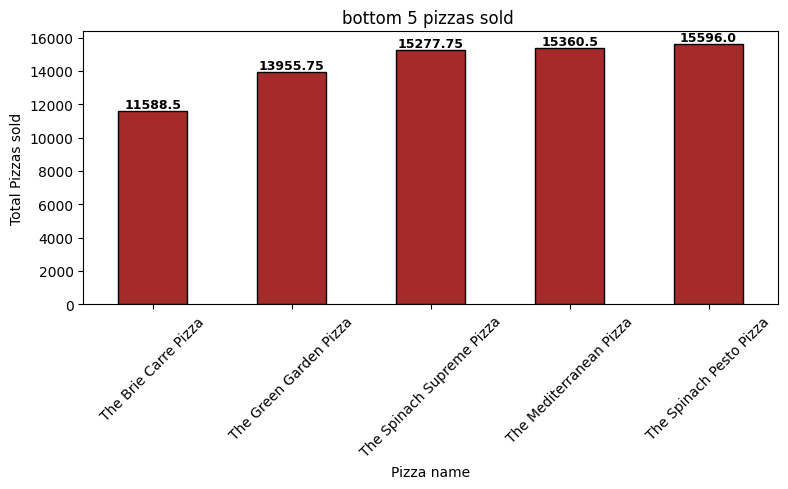

In [28]:
pizzas_by_name=df.groupby('pizza_name')['total_price'].sum()
bottom5=pizzas_by_name.sort_values(ascending=True).head(5)
ax=bottom5.plot(kind='bar',figsize=(8,5),color='brown',edgecolor='black')
plt.title("bottom 5 pizzas sold ")
plt.xlabel("Pizza name")
plt.ylabel("Total Pizzas sold")
plt.xticks(rotation=45)
for i, val in enumerate(bottom5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom',
             fontsize=9, fontweight='bold')
plt.tight_layout()